# Pre-amble

Author: Calvin Wen

The purpose of this notebook is to prove that it is possible to retrieve information from signals (-20dB) below the noise floor. Such is the case for GPS signals, which uses CDMA & BPSK modulation techniques.

# Import libraries

In [1]:
import random
import numpy as np
%matplotlib inline
from numpy import sin, pi

from matplotlib import rcParams
import matplotlib.pylab as plt

# Create Carrier Wave

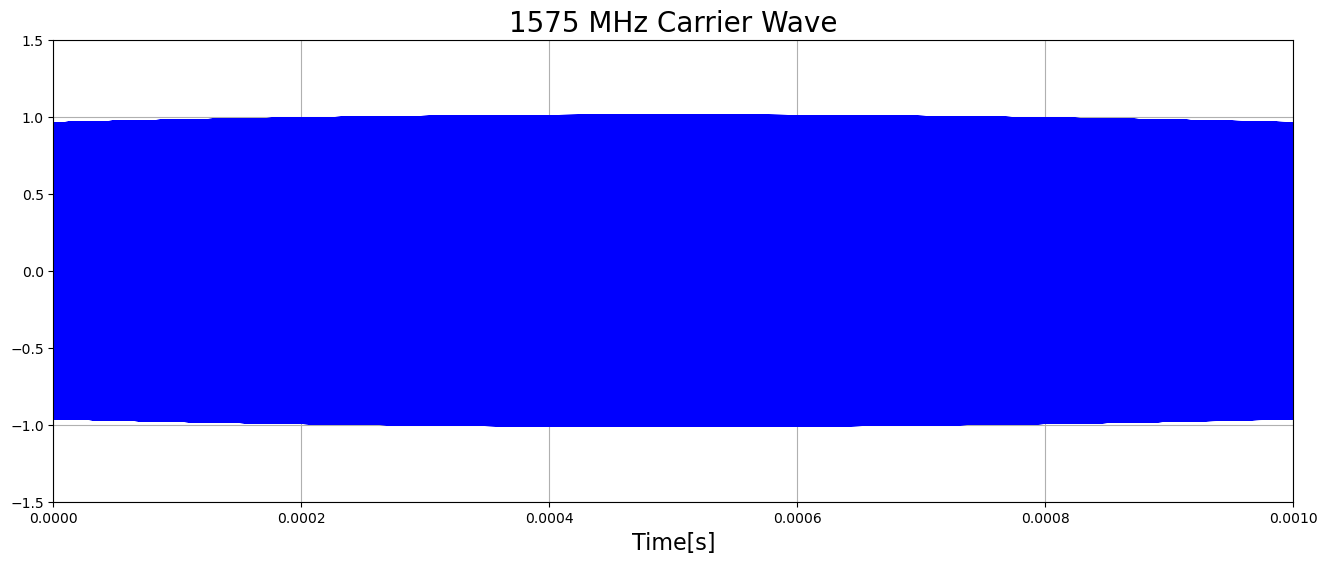

In [2]:
f = 1575e6
f_prn =  1.023e6
t=np.linspace(0,1e-3,int(10e-3*f))
# print(len(t))
carrier = lambda t,f: sin(2*pi*f*t)

plt.figure(figsize=(16,6))
plt.plot(t,carrier(t,f),'b', lw=3)
plt.title('1575 MHz Carrier Wave',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.xlabel('Time[s]',size='16')
plt.grid()

# Create Psuedo Random Noise (PRN) code for CDMA

In [3]:
random.seed("GPS PRN")
prn_seq = [random.choice([1,-1]) for i in range(1023)]

print("Our PRN chip:", str(prn_seq).replace('-1','0'))

Our PRN chip: [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0

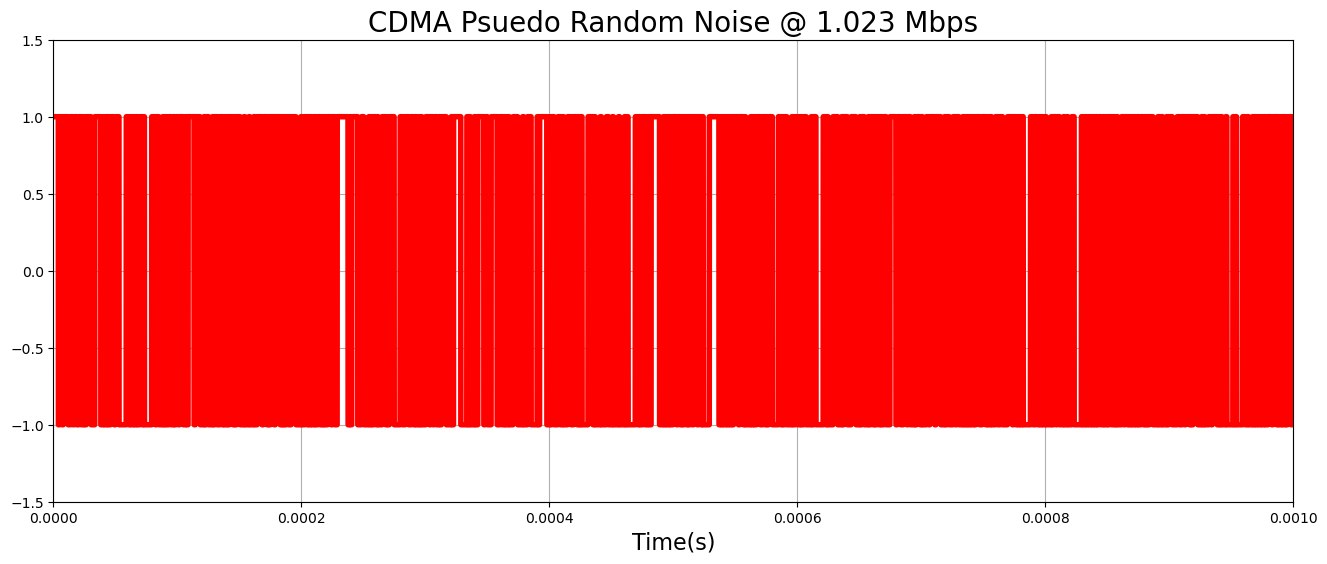

In [4]:
def prn_np(t, f_prn, prn_seq, bit):
    return [ prn_seq[int(ti*f_prn)%1023]*bit for ti in t]

bit = -1 # this represents the data bit taht contains GPS information
data = prn_np(t,f_prn, prn_seq, bit)

plt.figure(figsize=(16,6))
plt.plot(t,data, color='red',lw=4)
plt.title('CDMA Psuedo Random Noise @ 1.023 Mbps',size='20')
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.xlabel('Time(s)',size='16')
plt.grid()

# Binary Phase Shift Keying (BPSK)

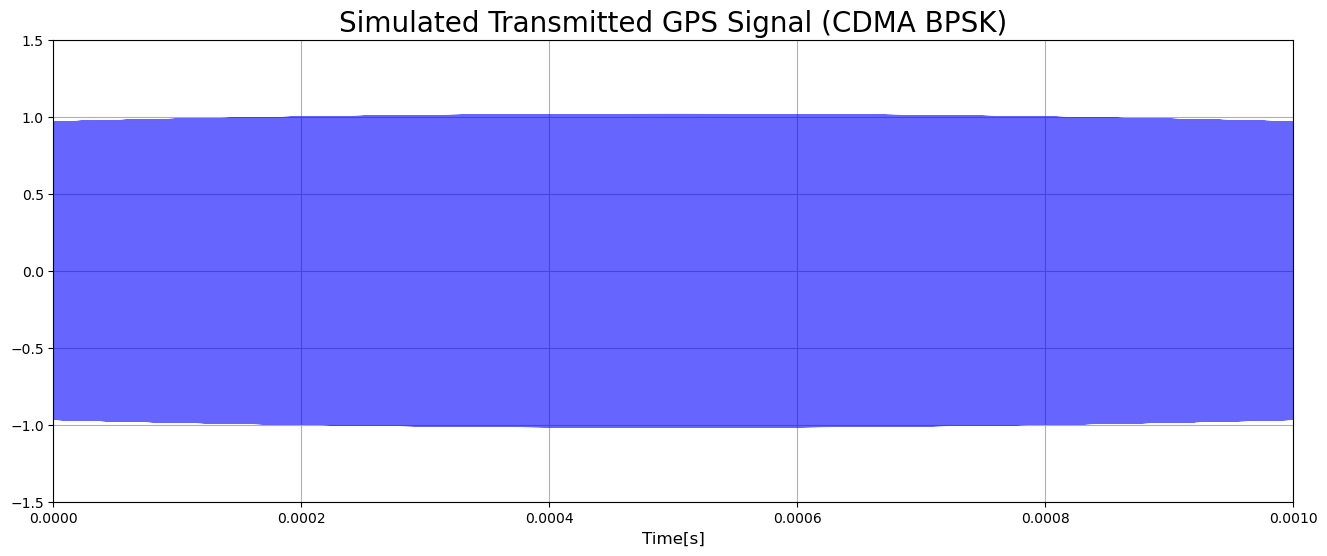

In [5]:
signal = lambda t,f_prn, carrier, data: carrier(t,f) * data
modulated_signal = signal(t,f_prn, carrier, data)

plt.figure(figsize=(16,6))
# plt.plot(t,prn_np(t,f_prn),color='red',lw=4)
plt.plot(t,modulated_signal,'b',lw=4,alpha=0.6)
plt.title('Simulated Transmitted GPS Signal (CDMA BPSK)',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-1.5,1.5])
plt.xlabel('Time[s]',size=12)
plt.grid()

# Correlation Study

## Simulate GPS Signal -20dB below noise floor

In [6]:
# Generate signals
snr = -20 #db
noise_amp = 10**-(snr/10)*1
noise = noise_amp* np.random.normal(0, 1, len(t))
ref_prn = prn_np(t,f_prn, prn_seq, 1)
ref_signal = signal(t,f_prn, carrier, ref_prn)
signal_noisy = modulated_signal + noise

## Visualise simulated noisy received  GPS signal

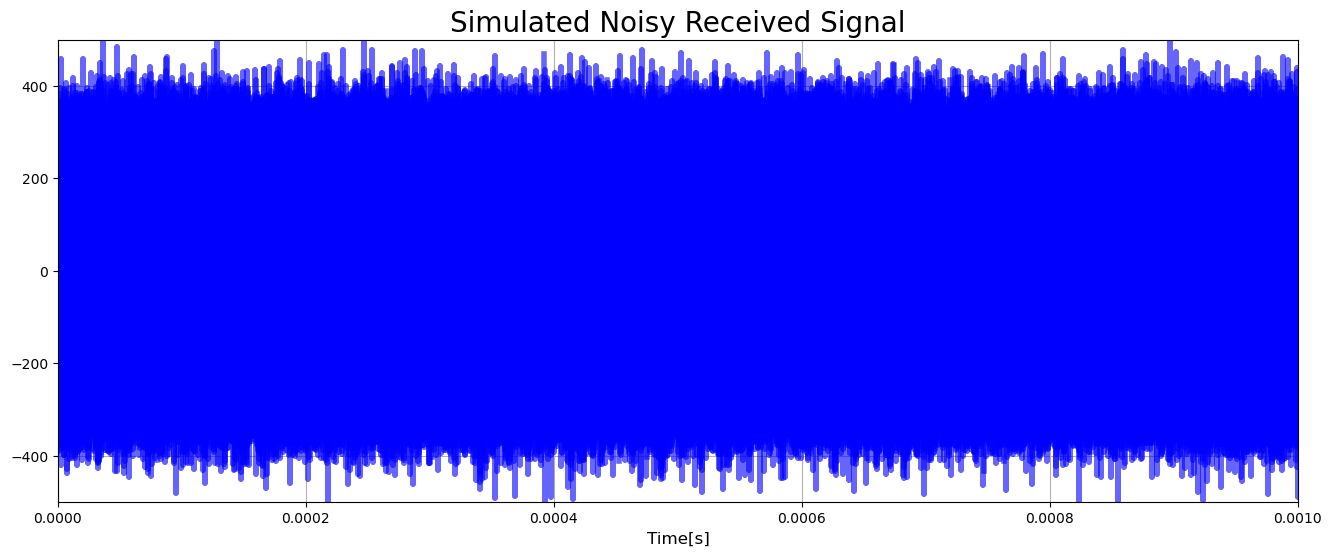

In [7]:
rcParams['agg.path.chunksize'] = 101
rcParams['path.simplify_threshold'] = 0.7
plt.figure(figsize=(16,6))
plt.plot(t,signal_noisy,'b',lw=4,alpha=0.6)
plt.title('Simulated Noisy Received Signal',size=20)
plt.xlim([0,t[-1]])
plt.ylim([-500,500])
plt.xlabel('Time[s]',size=12)
plt.grid()

## Correlation on CA signal hidden under noise floor

In [8]:
gps_correlation = np.corrcoef(ref_signal, signal_noisy)[0, 1]
print('CA Correlation:', gps_correlation)

CA Correlation: -0.00681438199812295


## Correlation on Pure Noise

In [9]:
snr = -20 #db
noise_amp = 10**-(snr/10)*1
signal1 = noise_amp* np.random.normal(0, 1, len(t))
# signal2 = np.random.normal(0, 1, len(t))

noise_correlation = np.corrcoef(ref_signal, signal1)[0, 1]
print('Noise Correlation:', noise_correlation)

Noise Correlation: -0.00026391923536998413


## Comparison between correlation values of noise and GPS signal hidden below noise floor

In [10]:
print("Simulated CA correlation normalised to noise correlation: ",gps_correlation/noise_correlation)
print("Correlation value of GPS signal -20dB below noise floor is {:.2f} times that of correlation value of pure noise".format(gps_correlation/noise_correlation))

Simulated CA correlation normalised to noise correlation:  25.819952034075794
Correlation value of GPS signal -20dB below noise floor is 25.82 times that of correlation value of pure noise


## Simulate a bitstream to be transmitted

In [11]:
bitstream = [1,0,0,1,1,0,1,1,0,0]
received_signal = []
snr = -20 #db
noise_amp = 10**-(snr/10)*1
t_full=np.linspace(0,1e-3*len(bitstream),int(10e-3*f)*len(bitstream))

noise = noise_amp* np.random.normal(0, 1, len(t))
ref_prn = prn_np(t,f_prn, prn_seq, 1)

ref_signal = signal(t,f_prn, carrier, ref_prn)

for bit in bitstream:
    if bit == 0:
        bit = -1
    data = prn_np(t,f_prn, prn_seq, bit)
    modulated_signal = signal(t,f_prn, carrier, data)
    signal_noisy = modulated_signal + noise
    received_signal.extend(signal_noisy)



In [32]:
corr_window = [0,len(t_full)/ len(bitstream)]
divider = 5
corr_steps = divider*len(bitstream)
step = int(len(t) * (len(bitstream))/ (corr_steps))
corrs = []
corrs_t = []
for i in range(corr_steps - divider + 1):
    start = int(corr_window[0] + i*step)
    end = int(corr_window[1] + i*step)
    # print(t_full[start], t_full[end-1])
    query_signal = received_signal[start:end]
    correlation = np.corrcoef(ref_signal, query_signal)[0, 1]
    corrs.append(correlation)
    corrs_t.append(t_full[end-1])

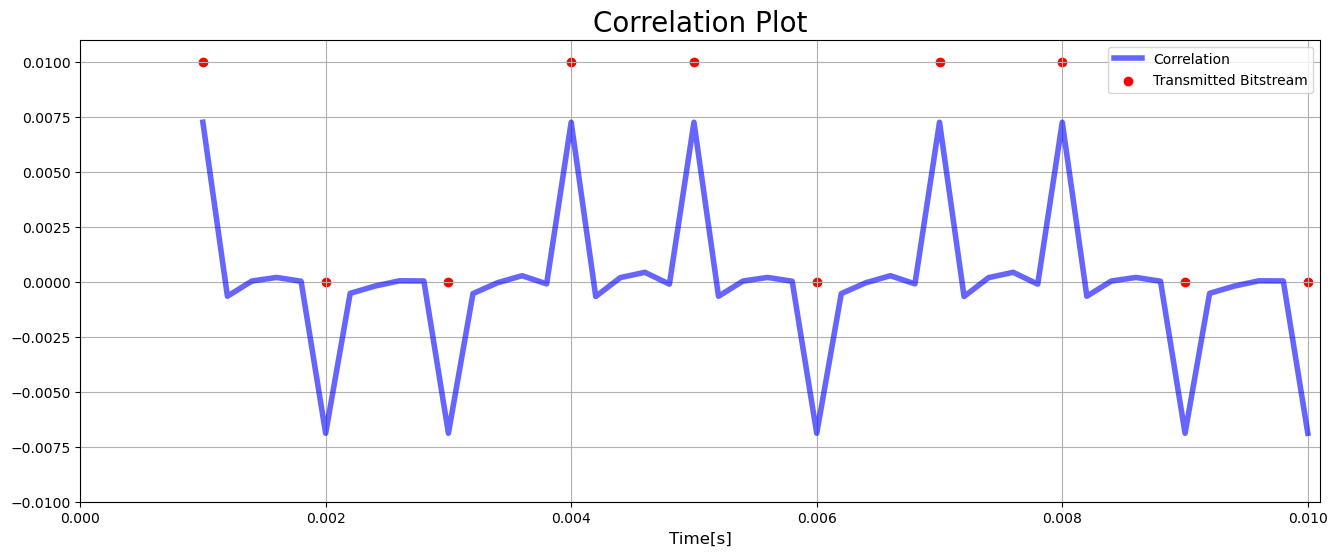

In [40]:

t_bits = np.linspace(0.001,0.001 * len(bitstream), len(bitstream))
plt.figure(figsize=(16,6))
plt.plot(corrs_t,corrs,'b',lw=4,alpha=0.6)
plt.scatter(t_bits, np.multiply(bitstream, 0.01), c='r')
plt.title('Correlation Plot',size=20)
plt.xlim([0,corrs_t[-1]+0.0001])
plt.ylim([-0.01,0.011])
plt.xlabel('Time[s]',size=12)
plt.grid()
plt.legend(["Correlation", "Transmitted Bitstream"])